<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_2_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gentlemen:
Let us use this for our finished code.
Work indivicually and then wehen someone gets a peice to work , e.g., Plotly plot, copy the code to hear.

In [ ]:
# %matplotlib inline

# Libraries

In [5]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn import metrics

# Options

In [ ]:
# Get rid of scinetific notation
#pd.set_option('display.float_format', lambda x: '%.8f' % x)

# to revert
#pd.reset_option('display.float_format')

# Data

In [ ]:
Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
#Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
Porc_Op.head(2) 


In [ ]:
Porc_Op.tail(5)

In [ ]:
Porc_Op.shape

(54, 943)

In [ ]:
Porc_Op.dtypes

date                     object
Quantity                float64
Seasonal                float64
Consumer_loans          float64
Construction_lic_unt    float64
                         ...   
Treasury_loanlag_12     float64
Housing_loanlag_12      float64
holiday                   int64
sunday                    int64
working_day               int64
Length: 943, dtype: object

In [ ]:
#Which col is the index?  
# JDS thought a different col was the index 
#and they said that caused athem a lot of work.

Porc_Op.index()

#Now subset Quantity and the Credit Features

(Joe) I have this idea that I thik we nee dot do a series of pair plots we could use the sepaerate datasets as a natural way of deciding what goes in each of the seperate plots.

I looked up what Features were in one of the csv files then fromteh the merged data set Juan's code led me to make I subsetted Quantity and all of th features fromthat csv.

In [ ]:
credit_subset =Porc_Op[['Quantity','Consumer_credit','Consumer_microcredit', 'Ordinary_credit',
                         'Preferencial_credit','loan_overdrafts','Credit_card', 'Treasury_loan',
                         'Housing_loan']]

In [ ]:
credit_subset.head(3)

,Quantity,Consumer_credit,Consumer_microcredit,Ordinary_credit,Preferencial_credit,loan_overdrafts,Credit_card,Treasury_loan,Housing_loan
0,1.503548,3092166.066,331812.3476,4498496.510,3728949.886,5515276.146,3370234.662,225521.4428,9.077151e+05
1,0.076213,4515186.342,451305.4187,7087850.705,4505899.231,6331676.215,3469317.755,349373.5640,1.609027e+06
2,-1.346258,6326616.526,570278.7259,7736718.499,5031263.817,8189116.436,4411360.214,486325.0495,2.087283e+06


In [ ]:
#Note in options at the very top I surpressed scientific notation
#change it back if you prefer.
credit_subset.tail(3)

,Quantity,Consumer_credit,Consumer_microcredit,Ordinary_credit,Preferencial_credit,loan_overdrafts,Credit_card,Treasury_loan,Housing_loan
51,0.79841006,8129448.34989000,501240.18192000,5784924.39931000,6729714.52454000,4087633.14495000,5271367.53313000,660828.32190000,2315315.88528000
52,-0.50289396,6333574.49347000,362509.13949000,5056129.25555000,7401186.19605000,4188024.32403000,5439582.48854000,548910.34558000,1989436.79243000
53,1.41610737,9191651.08896000,548634.36762000,6861119.52819000,8936970.38716000,4797926.25759000,7896086.74324000,672284.37876000,2923877.97589000


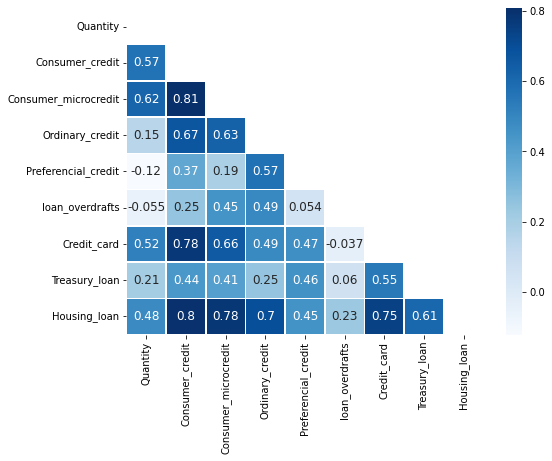

In [ ]:
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(credit_subset.corr(), dtype=np.bool))
sns.heatmap(data = credit_subset.corr(), annot= True, linewidths=.5, cmap='Blues', mask=mask,  annot_kws={"fontsize":12})

### Multi Linear Regression: Dear Juan, Having Neg Quatities precludes some feature selection methods.  Perhaps you could mess mess withthe data some other way, ^3, then square root , then multiply it and divdie it , so that it is annoymized and then we could scale the data from 0:1 ? 



In [ ]:
Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
Porc_Op.head(3) 

In [63]:
corr_data = Porc_Op

In [64]:
corr_data['Date_2'] = corr_data.date

In [65]:
# Move the date column back to being the index
corr_data.set_index('date', inplace= True)

In [ ]:
corr_data.head(5)

In [ ]:
corr_data.tail(5)

# Data Split

In [68]:
corr_data_select = corr_data[['Quantity', 'Gray_cement_dispatch_comercial', 'Gray_cement_dispatch_other','Gray_cement_dispatch','Gray_cement_prod','Housing_total_sales_SI',
               'holiday','Construction_lic_untlag_4' ,'Imports_quantitylag_4','Construction_lic_arealag_4','Construction_lic_area_NO_SIlag_4']]

In [ ]:
corr_data_select.head(3)

In [71]:
feature_cols =  corr_data[['Gray_cement_dispatch_comercial', 'Gray_cement_dispatch_other','Gray_cement_dispatch','Gray_cement_prod','Housing_total_sales_SI',
               'Construction_lic_untlag_4' ,'Imports_quantitylag_4','Construction_lic_arealag_4','Construction_lic_area_NO_SIlag_4','holiday']]


In [74]:
feature_cols =  corr_data[['Gray_cement_dispatch_comercial', 'Gray_cement_dispatch_other','Gray_cement_dispatch','Gray_cement_prod','Housing_total_sales_SI',
               'Construction_lic_untlag_4' ,'Imports_quantitylag_4','Construction_lic_arealag_4','Construction_lic_area_NO_SIlag_4','holiday']]
feature_cols.head(2)

,Gray_cement_dispatch_comercial,Gray_cement_dispatch_other,Gray_cement_dispatch,Gray_cement_prod,Housing_total_sales_SI,Construction_lic_untlag_4,Imports_quantitylag_4,Construction_lic_arealag_4,Construction_lic_area_NO_SIlag_4,holiday
date,,,,,,,,,,
2017-01-01,502084.8330,45269.5875,913190.407,897063.518,9603.0,18579.0,51394.0,1736453.0,1207364.0,1
2017-02-01,530826.1625,49050.6025,1007968.299,1025704.960,9034.0,14453.0,71761.0,1533718.0,1262351.0,0


In [79]:
X = feature_cols
len(X)

54

In [80]:
y = corr_data_select['Quantity']
len(y)

54

### Now we have the independent, the X featureas and the y , dependent feature, now weirdly , we feed python 2 dataframes simultaneoulsy, X & y and tell it to place 80% of x in one bin , 20% in test bin, place 80% of y in one bin....

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [82]:
LinearReg = LinearRegression()  
LinearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

In [84]:
print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: -5.128641121054631
Coefficients: [ 9.24599694e-07  2.92693248e-05  3.86489693e-06 -2.06659778e-06
  8.37626098e-05 -9.13152347e-05 -5.99704007e-06  2.56642934e-06
 -1.29322556e-06 -6.91645279e-02]


In [87]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients": LinearReg.coef_[0]})

,Feature,Coefficients
0,Gray_cement_dispatch_comercial,9.245997e-07
1,Gray_cement_dispatch_other,9.245997e-07
2,Gray_cement_dispatch,9.245997e-07
3,Gray_cement_prod,9.245997e-07
4,Housing_total_sales_SI,9.245997e-07
5,Construction_lic_untlag_4,9.245997e-07
6,Imports_quantitylag_4,9.245997e-07
7,Construction_lic_arealag_4,9.245997e-07
8,Construction_lic_area_NO_SIlag_4,9.245997e-07
9,holiday,9.245997e-07


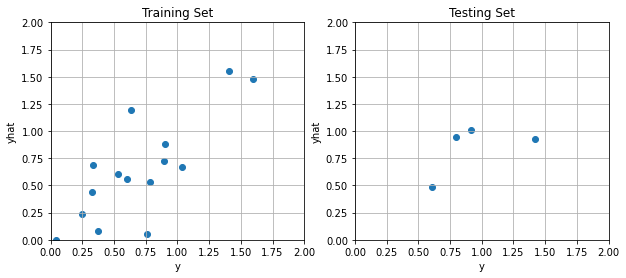

In [85]:
#Two plots togheter

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,2)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')


ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,2)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

So our scatters are not inspiring but maybbe that is just he way the real world looks?  Earlier I confusedly posted a supre scatter plot.  I thought that was ours but switching btween 3 windows I mstakenly called a variable from a sklearn tutorial.

So our test data R score is 0.48.  No good.  Ideas ,gentlemen?

I am going to look in sklearn auto feature selection and see what is out there

In [86]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.6897254404182074
Mean Absolute Error: 0.41698903043131946
Mean Squared Error: 0.32131769817897904
Root Mean Squared Error: 0.5668489200651079

Testing Metrics:
R squared: 0.48929934546542353
Mean Absolute Error: 0.4702417533600729
Mean Squared Error: 0.42895092680143015
Root Mean Squared Error: 0.6549434531327343


# Simple Line Charts of Quantity v Date

In [7]:
Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
LineGraph_data = Porc_Op
#Duplicate the date column
# It gets appended as the last collumn
LineGraph_data['Date_2'] = LineGraph_data.date
# Move the date column back to being the index
LineGraph_data.set_index('date', inplace= True)
# Next convert Date 2 to Date time to strip out Year & Month
LineGraph_data['Date_2'] = pd.to_datetime(LineGraph_data['Date_2'])
#Now add Year and Month columns
LineGraph_data['Year'] = LineGraph_data['Date_2'].dt.year
LineGraph_data['Month'] = LineGraph_data['Date_2'].dt.month

Text(0.5, 1.0, 'Porcelana Quantity: Year Over Year')

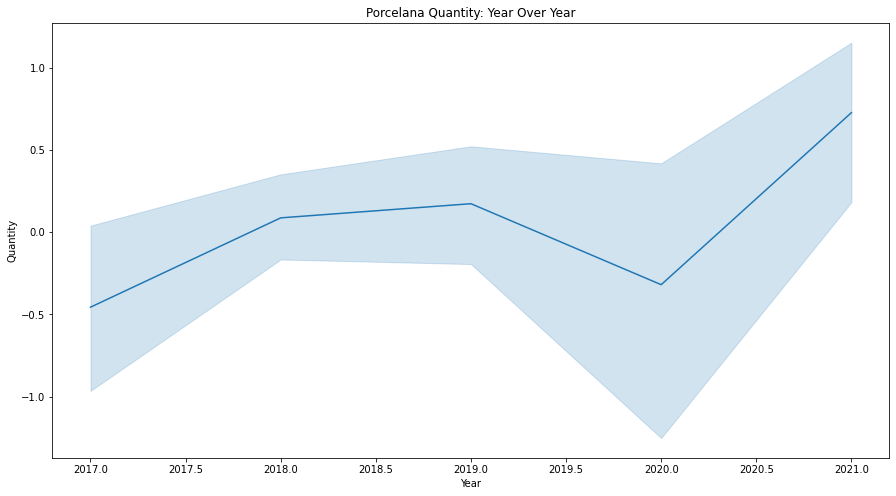

In [10]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='Quantity', data= LineGraph_data).set_title("Porcelana Quantity: Year Over Year")

Text(0.5, 1.0, 'Porcelana Quantity: Year Over Year')

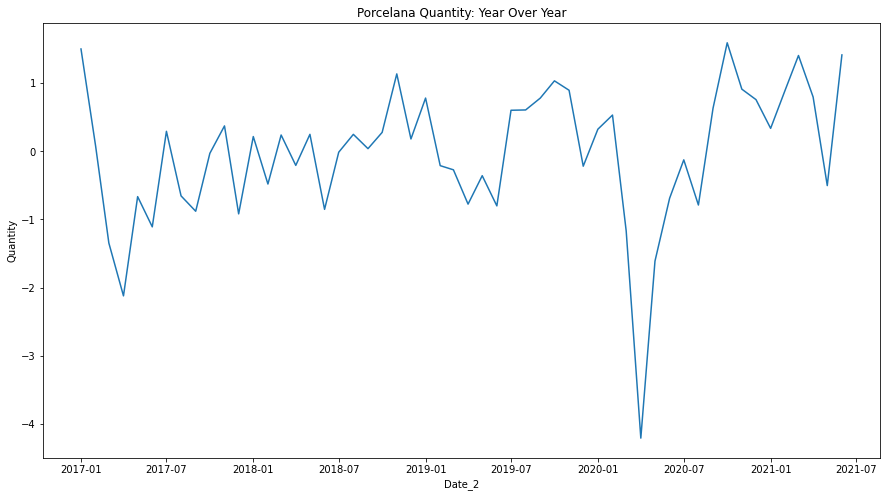

In [11]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Date_2', y='Quantity', data= LineGraph_data).set_title("Porcelana Quantity: Year Over Year")

Text(0.5, 1.0, 'Porcelana Quantity: Year Over Year')

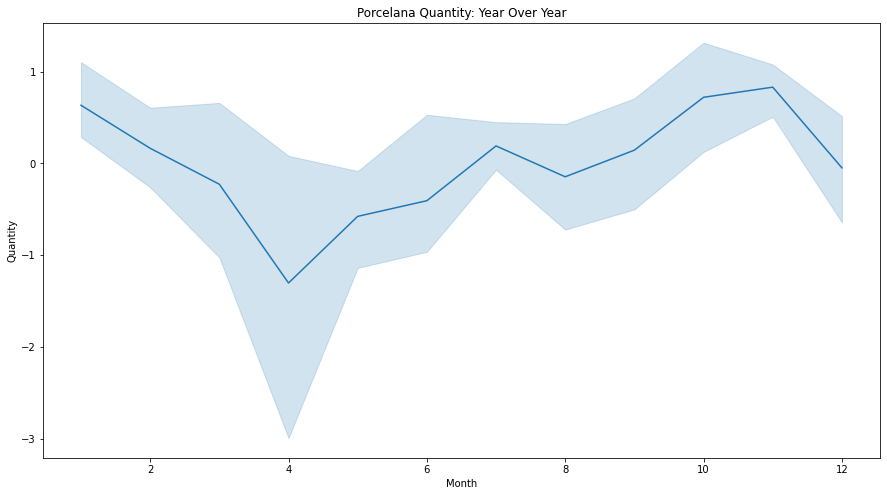

In [13]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Month', y='Quantity', data= LineGraph_data).set_title("Porcelana Quantity: Monthly: Year Over Year")

# Box Plots

Boxplots
Put the year over year sbunch together in teh same window for cpmparison. ame for Month over month

Create new column that is date.  

1. convert the index to a column

2. copy the column (now we have 2 of the same)

3. move one of them back to being the index again.  ( now sure why we need the index to be dates but donet wat to find out either)

In [ ]:
Porc_Op = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
Porc_Op.head(3) 

In [5]:
Boxplot_data = Porc_Op

In [ ]:
Boxplot_data.head(3)

In [7]:
#Duplicate the date column
# It gets appended as the last collumn

Boxplot_data['Date_2'] = Boxplot_data.date

In [8]:
Boxplot_data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921

In [9]:
# Move the date column back to being the index
Boxplot_data.set_index('date', inplace= True)

In [10]:
Boxplot_data.head(3)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000

# Boxplot Quantity

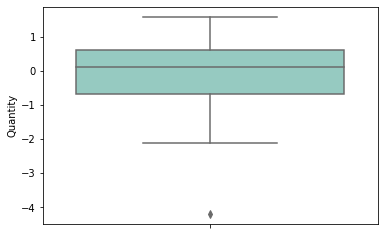

In [24]:
# box plot
ax = sns.boxplot( y="Quantity",
                 data= Boxplot_data, palette="Set3")

## Now lets extract the date to create new year and month columns to create year over year, month over month plots,etc

In [25]:
# create new column called Date2
Boxplot_data['Date_2'] = pd.to_datetime(Boxplot_data['Date_2'])


In [26]:

Boxplot_data['Date_2'].dtypes #<<<--- Stackoverlow assures us this is the same as data type "date"


dtype('<M8[ns]')

In [ ]:
# Boxplot_data['Date_2']

In [27]:
# convert the Purchase Date to datetime
#df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
# add a column for Year
#df['Year'] = df['Purchase Date'].dt.year
# convert the Purchase Date to datetime
##################
Boxplot_data['Date_2'] = pd.to_datetime(Boxplot_data['Date_2'])
# add a column for Year
Boxplot_data['Year'] = Boxplot_data['Date_2'].dt.year

In [28]:
Boxplot_data.head(3)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year,Month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017,Jan
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017,Feb
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.

In [29]:
Boxplot_data['Date_2'] = pd.to_datetime(Boxplot_data['Date_2'])
# add a column for Year
Boxplot_data['Month'] = Boxplot_data['Date_2'].dt.month

In [30]:
Boxplot_data.head()

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year,Month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017,1
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017,2
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,73152

In [31]:
import calendar
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
Boxplot_data['Month'] = Boxplot_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [32]:
Boxplot_data.head(3)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Date_2,Year,Month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,2017-01-01,2017,Jan
2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,2017-02-01,2017,Feb
2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.

## Box plot Year Over Year

# Quantity

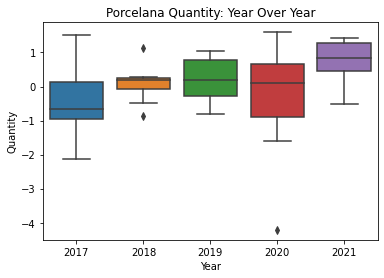

In [33]:
ax = sns.boxplot(x="Year", y="Quantity", data= Boxplot_data).set_title("Porcelana Quantity: Year Over Year")

Boxplot Month over month

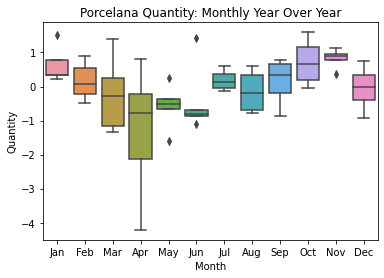

In [34]:
ax = sns.boxplot(x="Month", y="Quantity", data= Boxplot_data).set_title("Porcelana Quantity: Monthly Year Over Year")

# Boxplot Gray_cement_dispatch_comercial 

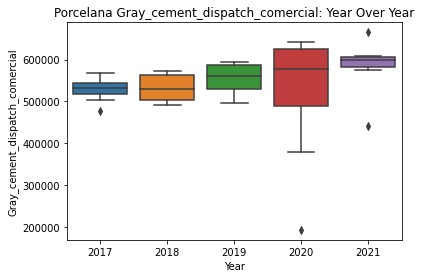

In [35]:
ax = sns.boxplot(x="Year", y="Gray_cement_dispatch_comercial", data= Boxplot_data).set_title("Porcelana Gray_cement_dispatch_comercial: Year Over Year")

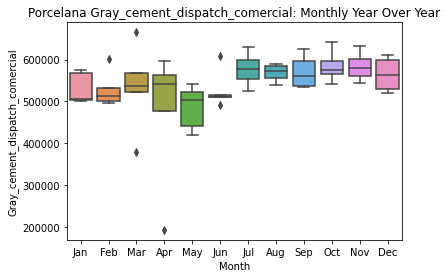

In [36]:
ax = sns.boxplot(x="Month", y="Gray_cement_dispatch_comercial", data= Boxplot_data).set_title("Porcelana Gray_cement_dispatch_comercial: Monthly Year Over Year")

# BoxplotGray_cement_dispatch_other

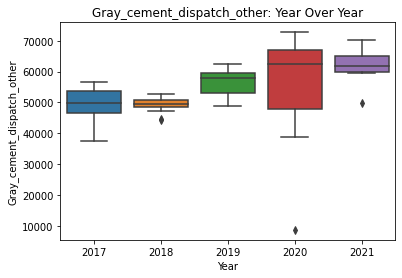

In [37]:
ax = sns.boxplot(x="Year", y="Gray_cement_dispatch_other", data= Boxplot_data).set_title("Gray_cement_dispatch_other: Year Over Year")

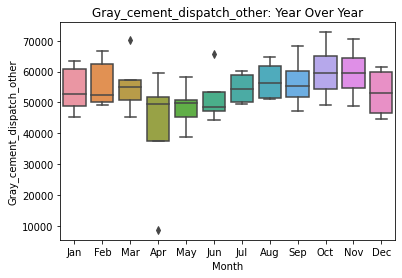

In [38]:
ax = sns.boxplot(x="Month", y="Gray_cement_dispatch_other", data= Boxplot_data).set_title("Gray_cement_dispatch_other: Year Over Year")

# Boxplot Gray_cement_prod 


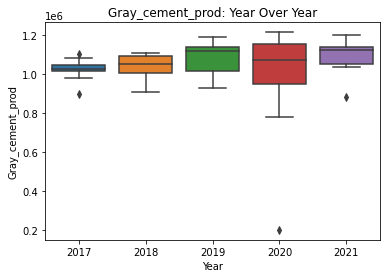

In [39]:
ax = sns.boxplot(x="Year", y="Gray_cement_prod", data= Boxplot_data).set_title("Gray_cement_prod: Year Over Year")

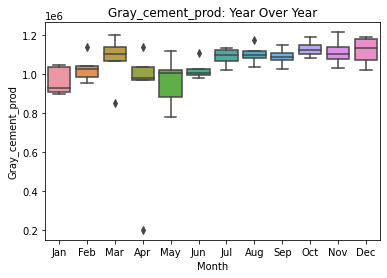

In [40]:
ax = sns.boxplot(x="Month", y="Gray_cement_prod", data= Boxplot_data).set_title("Gray_cement_prod: Year Over Year")

# Boxplot Housing_total_sales

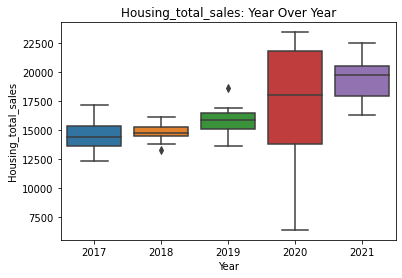

In [41]:
ax = sns.boxplot(x="Year", y="Housing_total_sales", data= Boxplot_data).set_title("Housing_total_sales: Year Over Year")

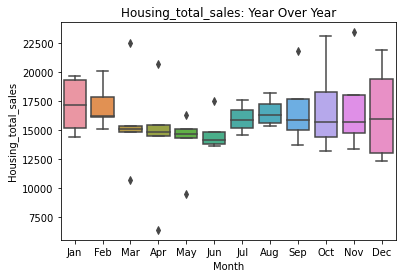

In [42]:
ax = sns.boxplot(x="Month", y="Housing_total_sales", data= Boxplot_data).set_title("Housing_total_sales: Year Over Year")

# Boxplot ISE

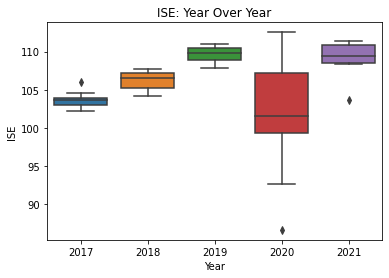

In [43]:
ax = sns.boxplot(x="Year", y="ISE", data= Boxplot_data).set_title("ISE: Year Over Year")

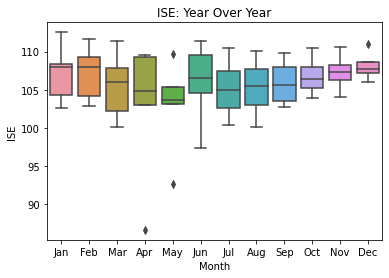

In [44]:
ax = sns.boxplot(x="Month", y="ISE", data= Boxplot_data).set_title("ISE: Year Over Year")

# Boxplot Housing_total_sales_SI

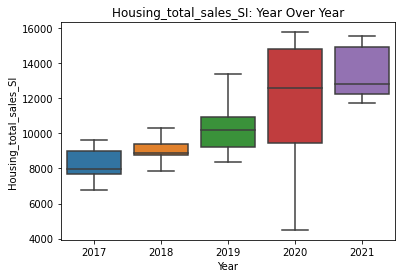

In [45]:
ax = sns.boxplot(x="Year", y="Housing_total_sales_SI", data= Boxplot_data).set_title("Housing_total_sales_SI: Year Over Year")

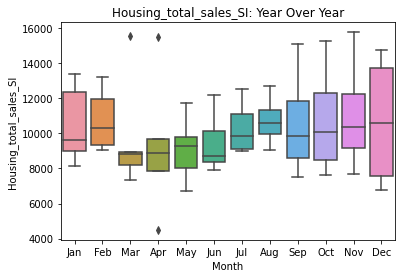

In [46]:
ax = sns.boxplot(x="Month", y="Housing_total_sales_SI", data= Boxplot_data).set_title("Housing_total_sales_SI: Year Over Year")

# Boxplot working_day

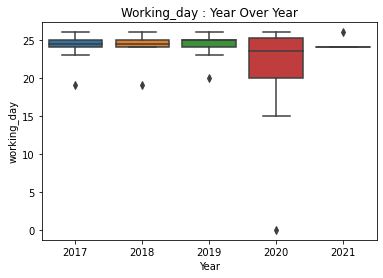

In [47]:
ax = sns.boxplot(x="Year", y="working_day", data= Boxplot_data).set_title("Working_day : Year Over Year")

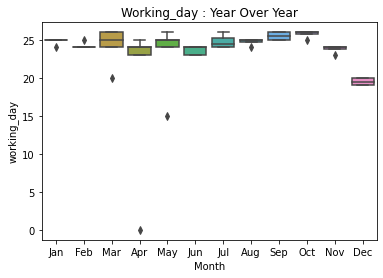

In [48]:
ax = sns.boxplot(x="Month", y="working_day", data= Boxplot_data).set_title("Working_day : Year Over Year")

#  Boxplot Consumer_microcredit

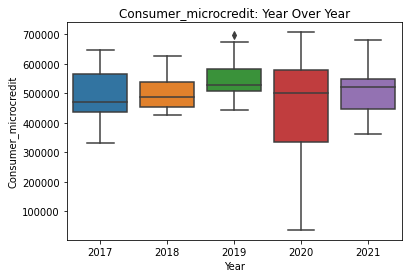

In [50]:
ax = sns.boxplot(x="Year", y="Consumer_microcredit", data= Boxplot_data).set_title("Consumer_microcredit: Year Over Year")

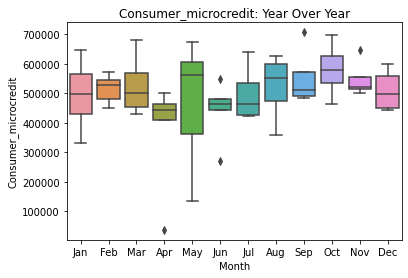

In [51]:
ax = sns.boxplot(x="Month", y="Consumer_microcredit", data= Boxplot_data).set_title("Consumer_microcredit: Year Over Year")

# Boxplot Gray_cement_dispatch_contractor

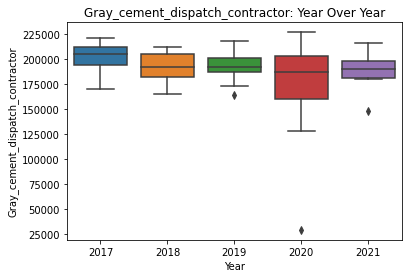

In [52]:
ax = sns.boxplot(x="Year", y="Gray_cement_dispatch_contractor", data= Boxplot_data).set_title("Gray_cement_dispatch_contractor: Year Over Year")

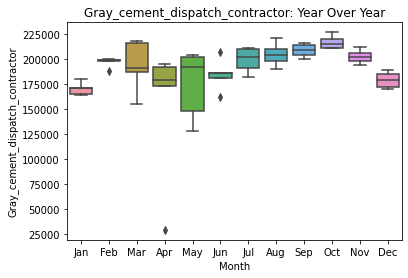

In [53]:
ax = sns.boxplot(x="Month", y="Gray_cement_dispatch_contractor", data= Boxplot_data).set_title("Gray_cement_dispatch_contractor: Year Over Year")

# PLOTLY GRAPHS: Gabriel's World .  Keep out!

In [88]:
 gabri_data = Porc_Op

In [89]:
import plotly.express as px

# Reading the dataset 
import pandas as pd
#gabri_data = pd.read_csv (r'Porcelana.csv')

# Drawing the figure 
fig = px.ecdf(gabri_data, x="Consumer_loans", y="Seasonal")
fig.show()

AttributeError: ignored